
# Data Visualization with Seaborn _ 05/09/2020
Introduction to Seaborn

Q: Which library would you prefer for plotting in Python language: Seaborn or Matplotlib?
A: Matplotlib is the python library used for plotting but it needs lot of fine-tuning to ensure that the plots look shiny. Seaborn helps data scientists create statistically and aesthetically appealing meaningful plots. The answer to this question varies based on the requirements for plotting data.

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [1]:
## https://seaborn.pydata.org/examples/index.html
##  https://github.com/mwaskom/seaborn-data).

### Data Visualization with Seaborn
### Distribution Plots

In [2]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


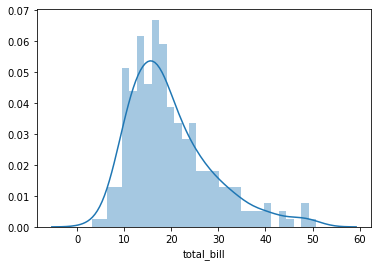

In [5]:
sns.distplot(tips['total_bill'], kde=True, bins=30) # Safe to ignore warnings

To remove the kde layer and just have the histogram use:

### jointplot
jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:

“scatter”
“reg”
“resid”
“kde”
“hex”

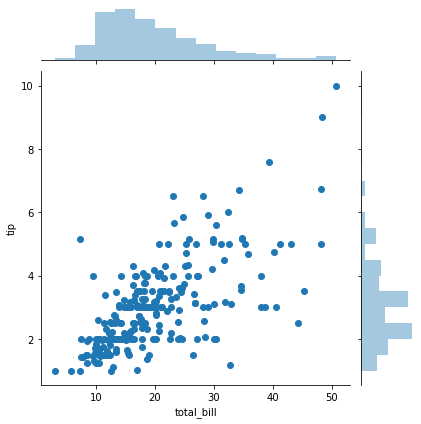

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips)

### pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

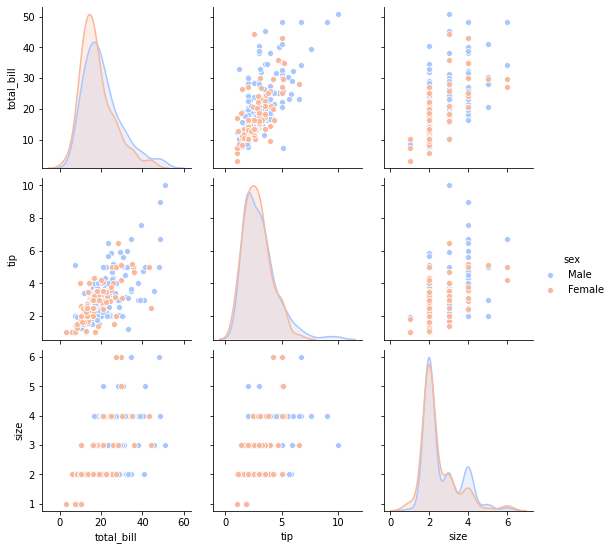

In [7]:
sns.pairplot(tips, hue="sex", palette='coolwarm')

### rugplot
rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

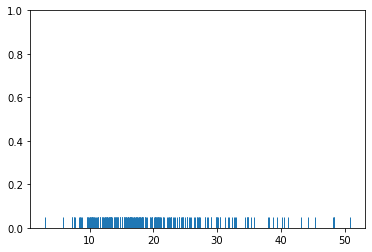

In [8]:
sns.rugplot(tips['total_bill'])

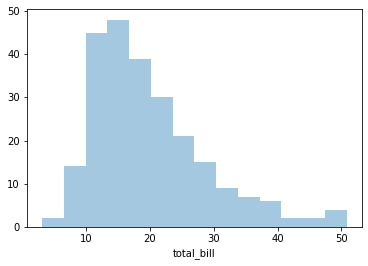

In [9]:
sns.distplot(tips['total_bill'], kde=False)

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

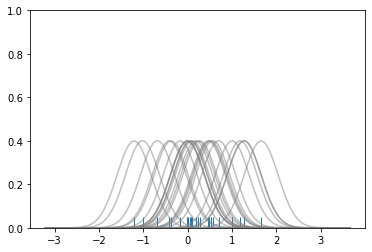

In [10]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

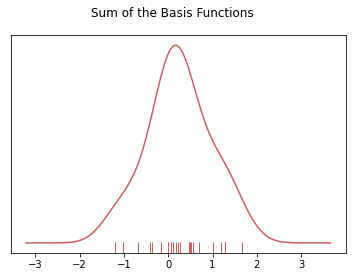

In [11]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

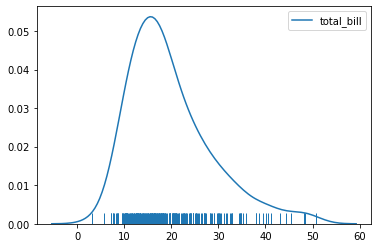

In [12]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

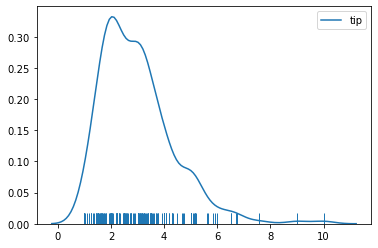

In [13]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## 06/09/2020 in clas Seaborn

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
diamonds=sns.load_dataset('diamonds')
exercise=sns.load_dataset('exercise')
flights=sns.load_dataset('flights')
geyser=sns.load_dataset('geyser')
iris=sns.load_dataset('iris')
penguins=sns.load_dataset('penguins')
planets=sns.load_dataset('planets')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

## distplot

In [16]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [17]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [18]:
penguins.shape

(344, 7)

In [19]:
penguins = penguins.dropna()

In [20]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [21]:
penguins.shape

(333, 7)

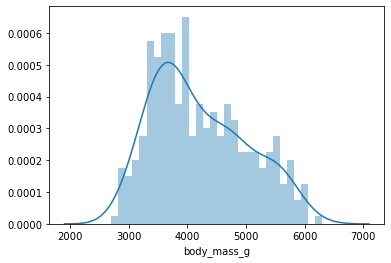

In [22]:
sns.distplot(penguins['body_mass_g'], bins=30);

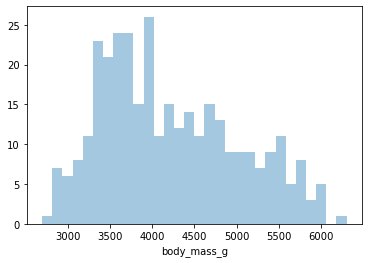

In [23]:
sns.distplot(penguins['body_mass_g'],  kde=False, bins=30); # hist_kws=dict(edgecolor='k', widthcolor="y")

(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <a list of 10 Patch objects>)

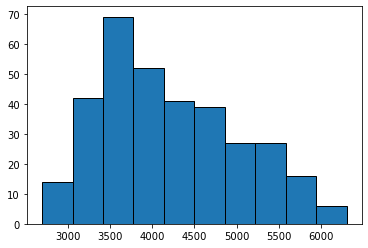

In [24]:
plt.hist(penguins['body_mass_g'], edgecolor='black')

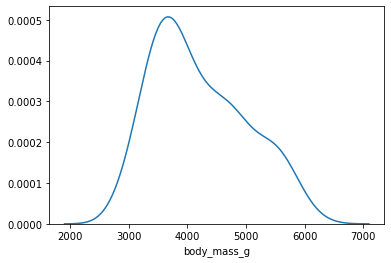

In [25]:
sns.distplot(penguins['body_mass_g'], hist=False);

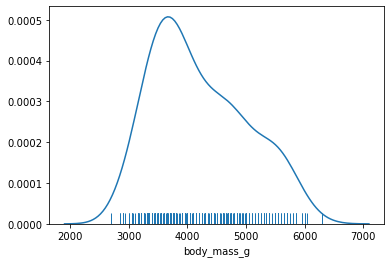

In [26]:
sns.distplot(penguins['body_mass_g'], hist=False, rug=True);

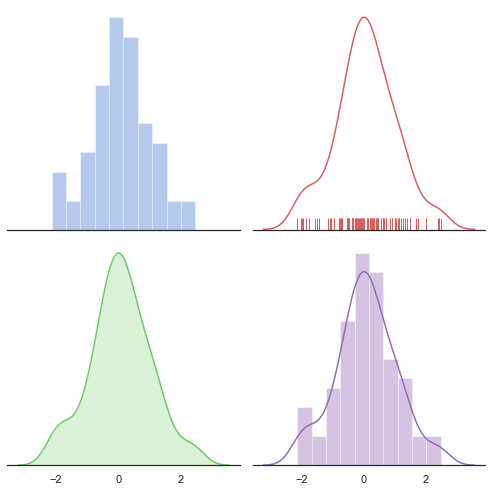

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True, bottom=False)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [28]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


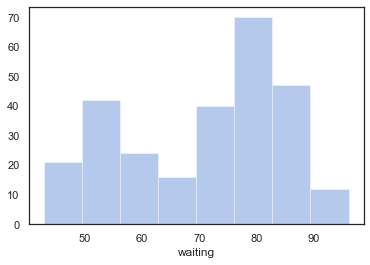

In [29]:
sns.distplot(geyser['waiting'], kde=False)

In [30]:
geyser['waiting'].mean()

70.8970588235294

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


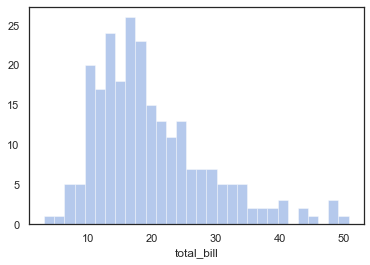

In [32]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

## Joinplot

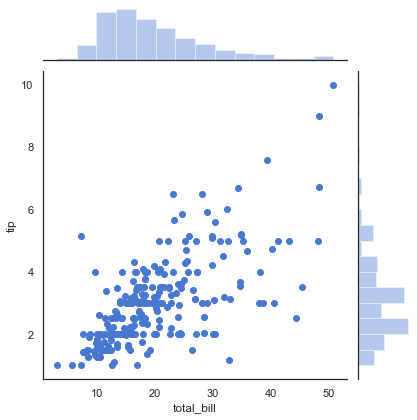

In [33]:
sns.jointplot(x='total_bill', y='tip', data=tips)

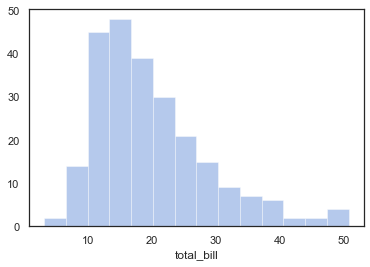

In [34]:
sns.distplot(tips.total_bill, kde=False)

In [35]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


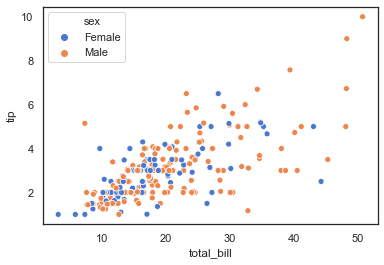

In [36]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

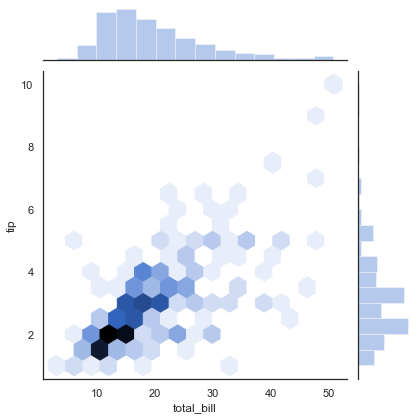

In [37]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex")

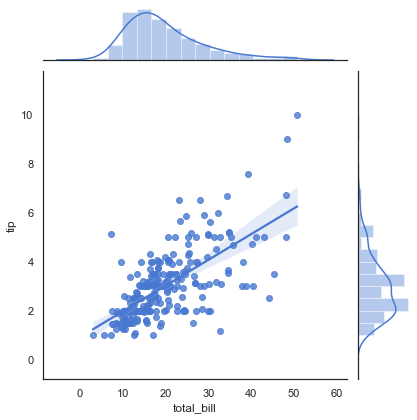

In [38]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind="reg" )

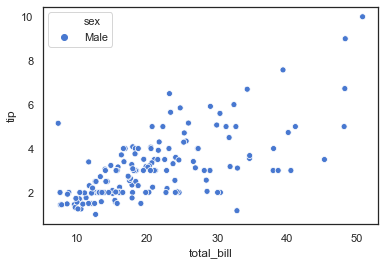

In [39]:
sns.scatterplot("total_bill", "tip", hue=tips[tips["sex"]=="Male"]["sex"], data=tips)

### pairplot
pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

In [40]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
mpg=mpg.drop(["displacement"], axis=1)

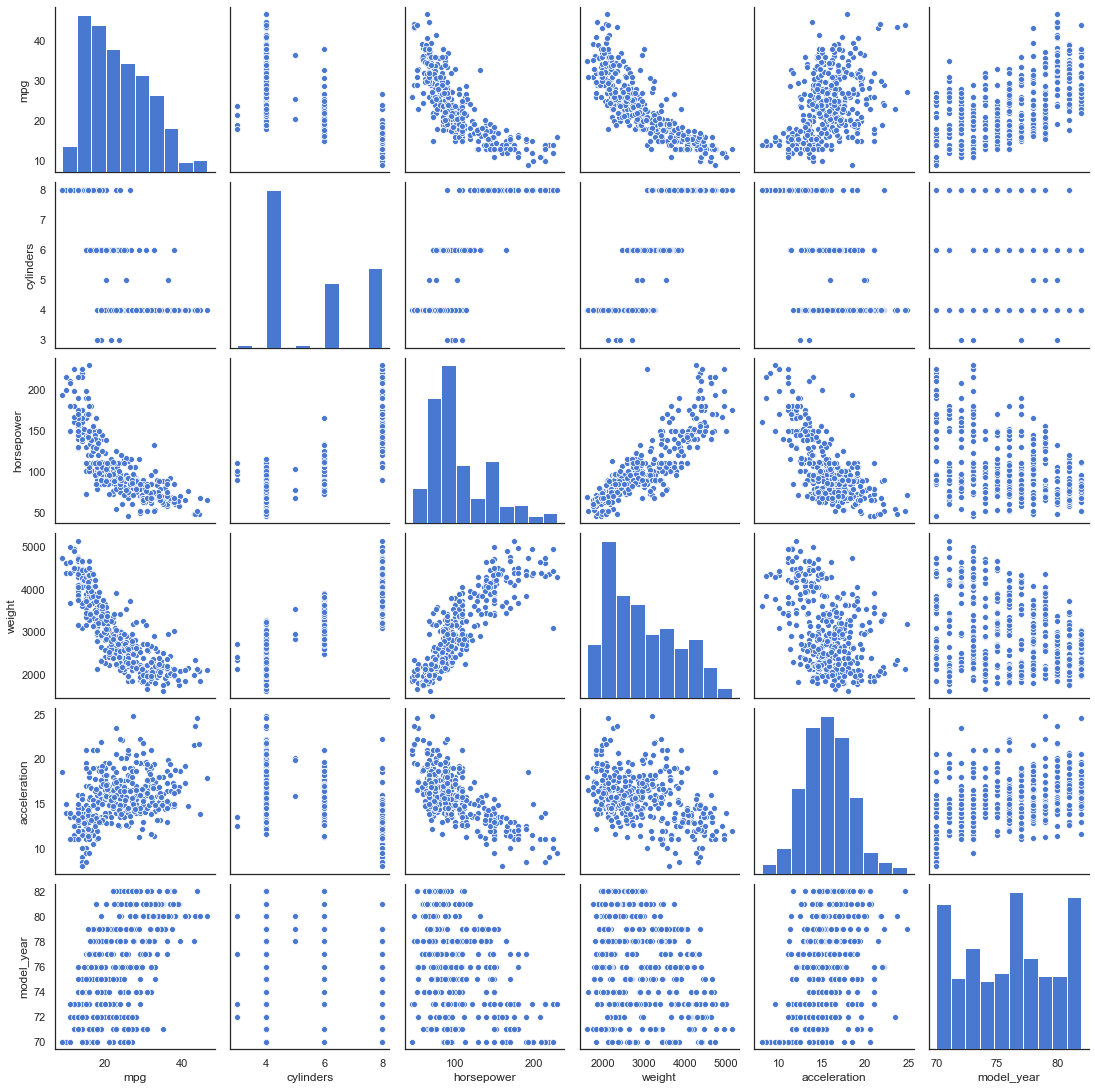

In [42]:
sns.pairplot(mpg);

In [43]:
mpg.groupby('model_year')['mpg'].mean()

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

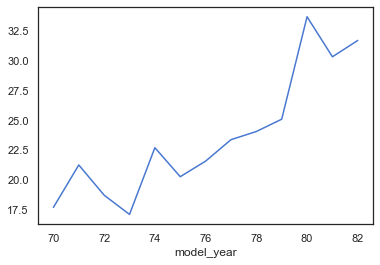

In [44]:
mpg.groupby('model_year')['mpg'].mean().plot()

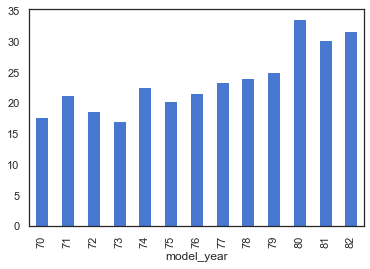

In [45]:
mpg.groupby('model_year')['mpg'].mean().plot.bar()

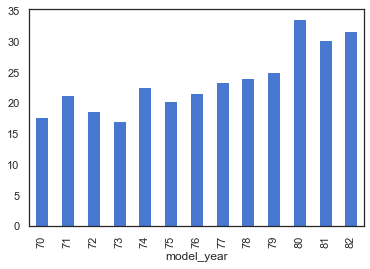

In [46]:
mpg.groupby('model_year').mpg.mean().plot(kind="bar")

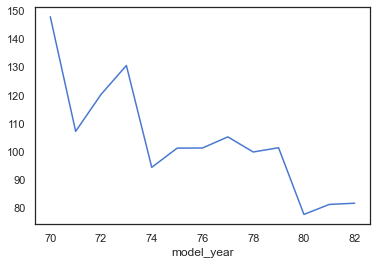

In [47]:
mpg.groupby("model_year")["horsepower"].mean().plot()

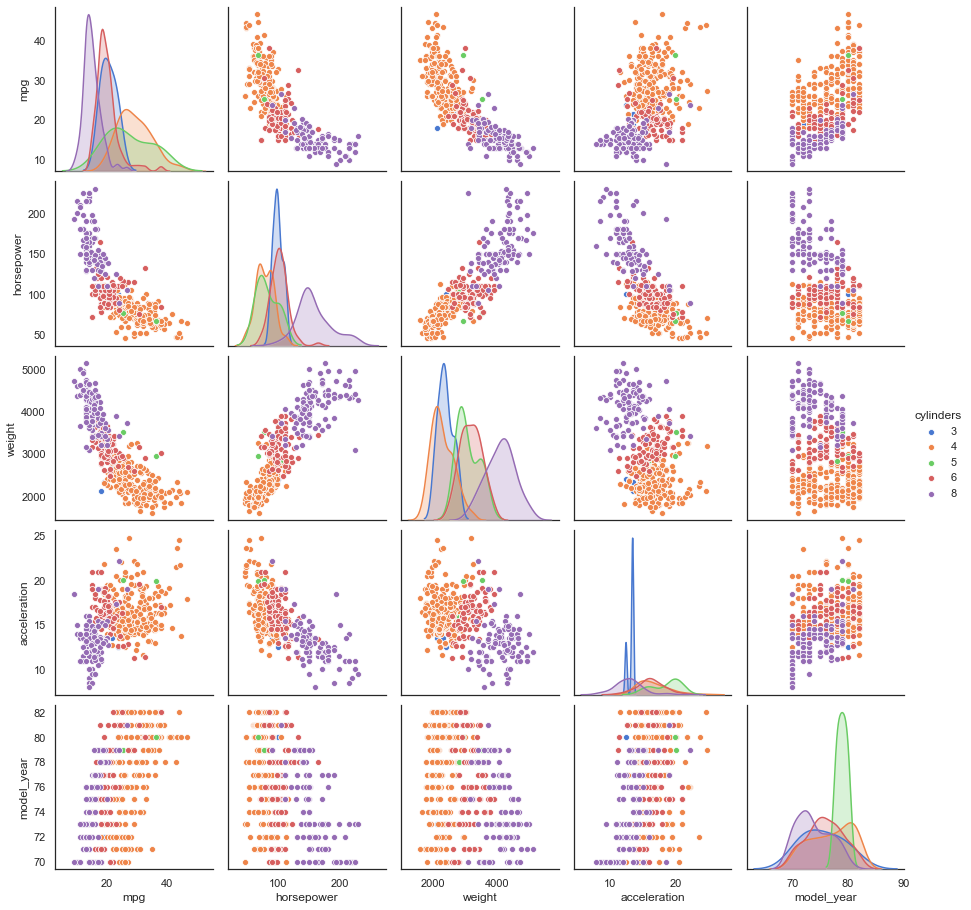

In [48]:
sns.pairplot(mpg, hue='cylinders')

#### 08/09/2020  Data Visualization with Python Session-5

In [49]:
# Kategorikal

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
iris=sns.load_dataset('iris')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

In [52]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### barplot and countplot

In [54]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
df = pd.DataFrame(list(zip(labels, men_means, women_means)), columns =["labels", "men_means", "women_means"])
df.head()

,labels,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


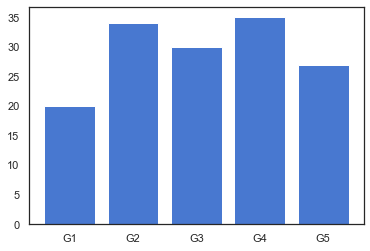

In [55]:
plt.bar(df['labels'], df['men_means']); # medplotlibde yapilisi

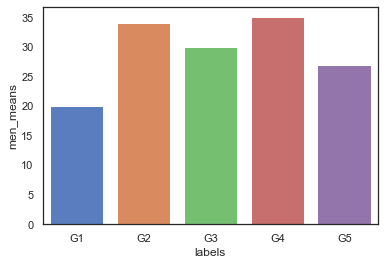

In [56]:
sns.barplot(df['labels'], df['men_means']); # method1 sns seabornda yapilisi x ve y den olusuyor.

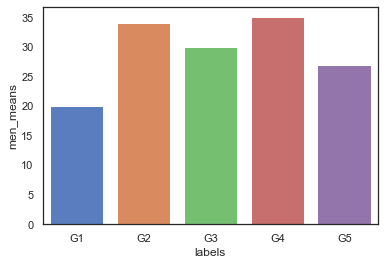

In [57]:
sns.barplot('labels', 'men_means', data=df);  # method1

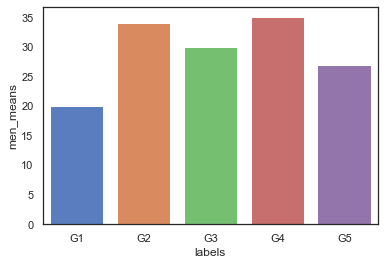

In [58]:
sns.barplot('labels', 'men_means', data=df);  # method1

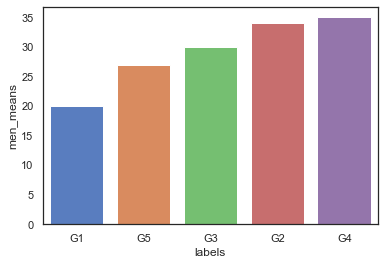

In [59]:
# order
sns.barplot(x='labels', y='men_means', order=['G1', 'G5', 'G3', 'G2', 'G4'], data=df);  # method2

In [60]:
df.sort_values("men_means").labels # siralama kodu yazdim, asagisa order en karsisina yerlestirdim

0    G1
4    G5
2    G3
1    G2
3    G4
Name: labels, dtype: object

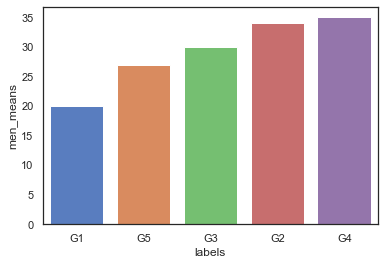

In [61]:
# order
sns.barplot(x='labels', y='men_means', order=df.sort_values("men_means").labels, data=df);  # method2

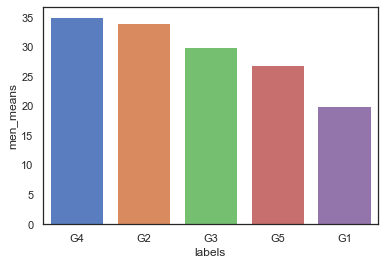

In [62]:
# auto order
sns.barplot(x='labels', y='men_means', order=df.sort_values("men_means", ascending = False).labels, data=df);  # method2

In [63]:
y=[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

In [64]:
x= ['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shel/PS',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']

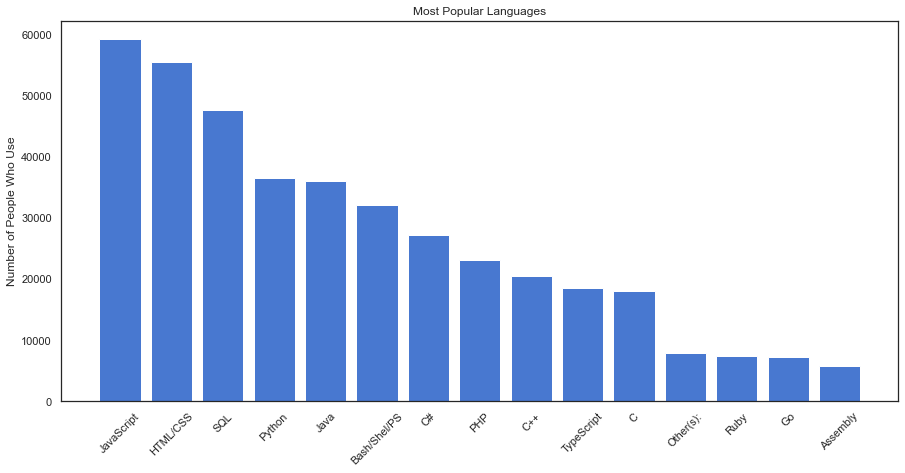

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x, y)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

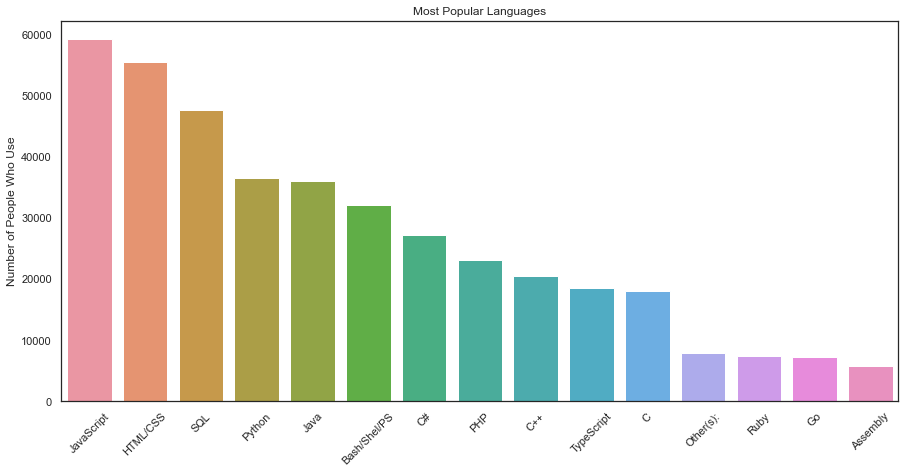

In [66]:
fig, ax = plt.subplots(figsize=(15, 7)) # seabornda ax yok, ac i silip  plt 
sns.barplot(x, y, ax=ax)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

In [67]:
#barplot(actual)

In [68]:
iris=sns.load_dataset('iris')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
tips.shape

(244, 7)

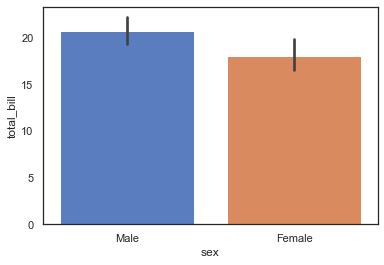

In [71]:
sns.barplot(x='sex', y="total_bill", data=tips);

In [72]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

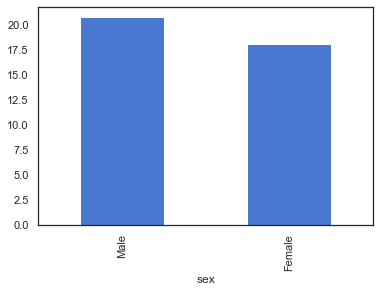

In [73]:
# with pandas # pandas plotlama formulu .plot.bar()
tips.groupby('sex')['total_bill'].mean().plot.bar() 

In [74]:
## with matplotlib

In [75]:
aa = tips.groupby('sex')['total_bill'].mean()

In [76]:
aa

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [77]:
aa.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, name='sex', dtype='category')

In [78]:
aa.values

array([20.74407643, 18.05689655])

<BarContainer object of 2 artists>

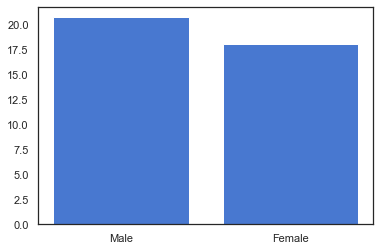

In [79]:
plt.bar(aa.index, aa.values)

In [80]:
# ci parameter

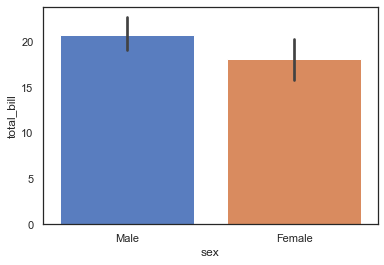

In [81]:
sns.barplot(x='sex', y='total_bill', ci=99 , data=tips);

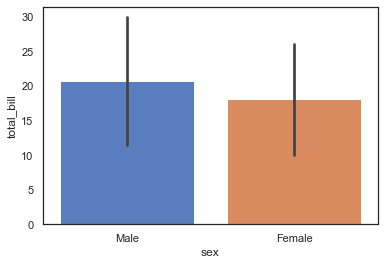

In [82]:
sns.barplot(x='sex', y='total_bill', ci='sd' , data=tips); # ci='sd' guven araligi

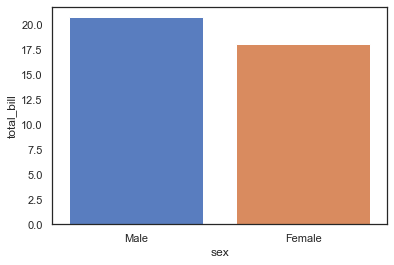

In [83]:
sns.barplot(x='sex', y='total_bill', ci=None , data=tips);

In [84]:
# hu parameter

In [85]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


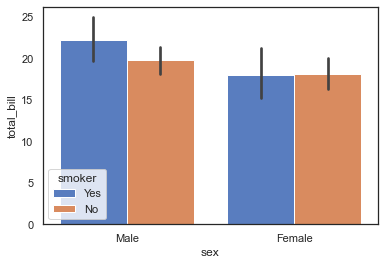

In [86]:
sns.barplot(x='sex', y='total_bill',hue='smoker' , data=tips);

In [87]:
# tip verilen bahsis

In [88]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


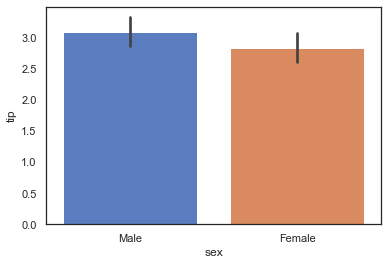

In [89]:
sns.barplot(x='sex', y='tip', data=tips);

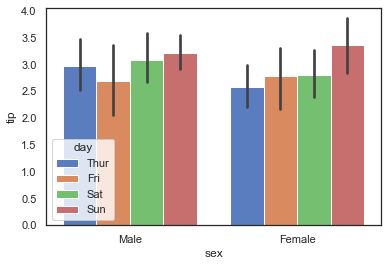

In [90]:
sns.barplot(x="sex", y="tip", hue="day", data=tips) ;

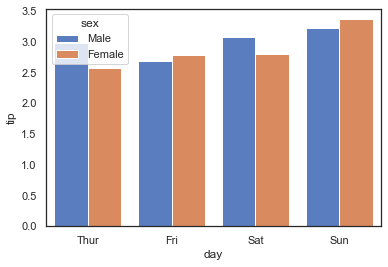

In [91]:
sns.barplot(x="day", y="tip", hue="sex",ci=None, data=tips) ;

In [92]:
# compare the avg in each day

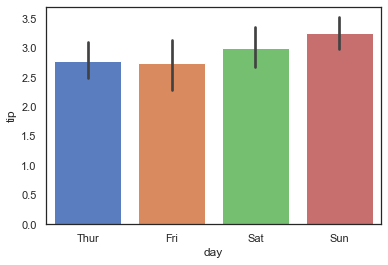

In [93]:
sns.barplot(x="day", y= "tip", data=tips)

In [94]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [95]:
# compare the avg horsepower for each cylinder 

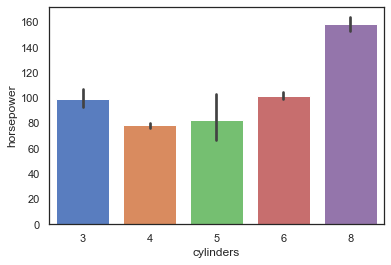

In [96]:
sns.barplot(x="cylinders", y= "horsepower", data=mpg)

In [97]:
titanic.head() # erkek ve bayanlarin yas ortalamalarini plotlayalim ayni zamanda yas ortalamalarini gosterelim

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


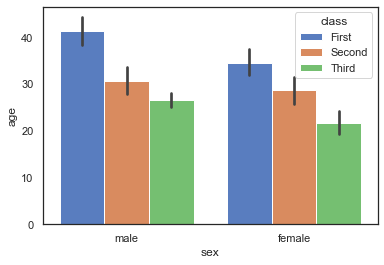

In [98]:
sns.barplot(x="sex", y="age", hue = "class", data=titanic)

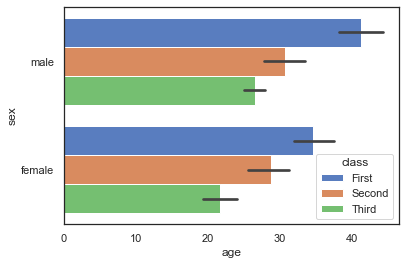

In [99]:
sns.barplot(x="age", y="sex", hue = "class", data=titanic)

## countplot

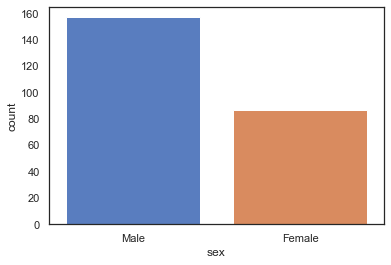

In [100]:
sns.countplot(x='sex', data=tips);

In [101]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

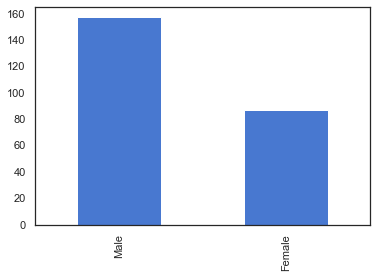

In [102]:
tips.sex.value_counts().plot(kind='bar')

In [103]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


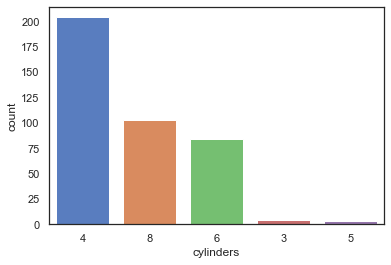

In [104]:
sns.countplot(x='cylinders', order=[4,8,6,3,5], data=mpg)

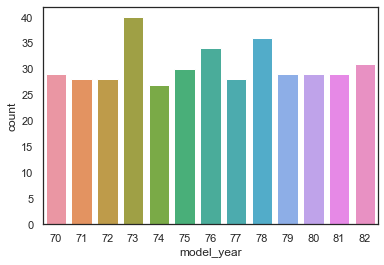

In [105]:
sns.countplot(x="model_year", data=mpg)

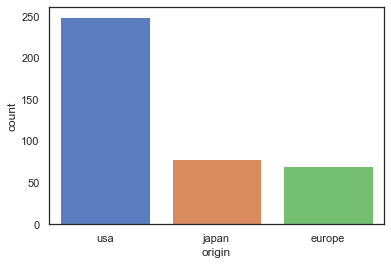

In [106]:
sns.countplot(x="origin", data=mpg)

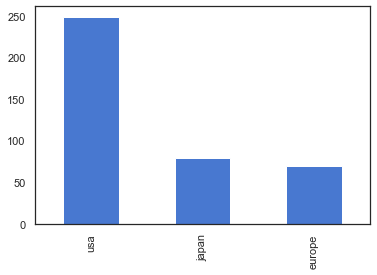

In [107]:
mpg.origin.value_counts().plot(kind ="bar")

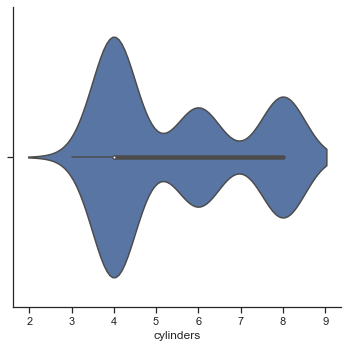

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
a = sns.load_dataset('mpg')
sns.catplot(x='cylinders', oder=mpg.cylinders.value_counts().index, kind='violin', data=mpg);

In [109]:
## box and violin plots

In [110]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


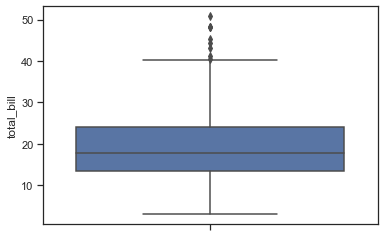

In [111]:
sns.boxplot(tips['total_bill'], orient='v');

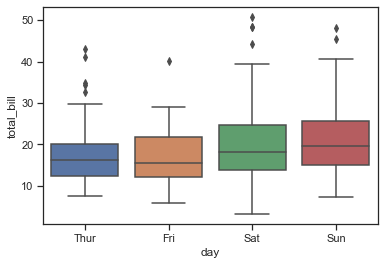

In [112]:
sns.boxplot(x='day',y='total_bill', data=tips); # x eksenine katagorik veri eklersek

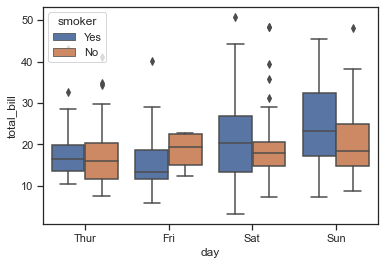

In [113]:
sns.boxplot(x='day',y='total_bill', hue = 'smoker',  data=tips);

In [114]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


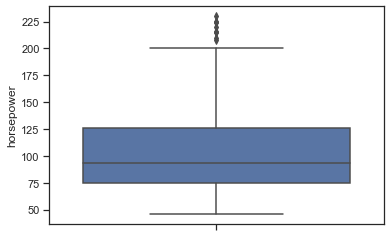

In [115]:
sns.boxplot('horsepower',  data=mpg, orient='v');

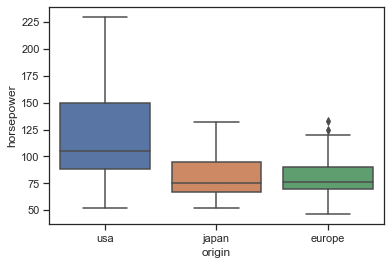

In [116]:
sns.boxplot(x='origin', y='horsepower', data=mpg);

In [117]:
## violin plot

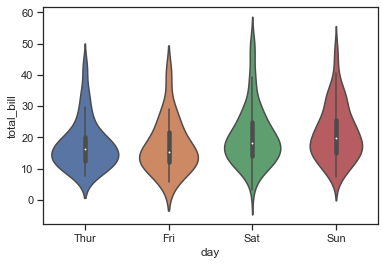

In [118]:
sns.violinplot(x='day', y='total_bill', data=tips);

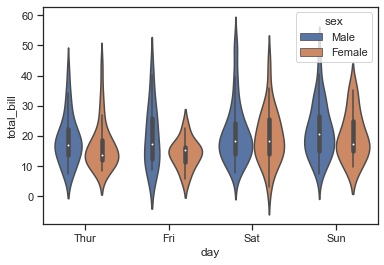

In [119]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips);

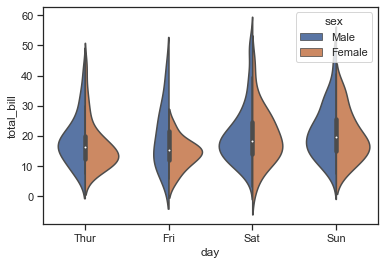

In [120]:
sns.violinplot(x='day', y='total_bill', hue='sex', split=True, data=tips); # split=True,bayan erkek ayni kemanda gozukuyor

In [121]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


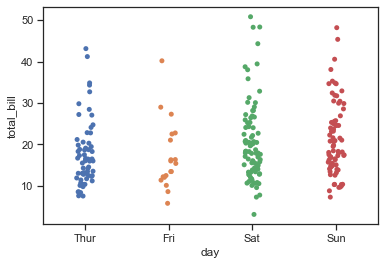

In [122]:
sns.stripplot(x='day', y='total_bill', data=tips);

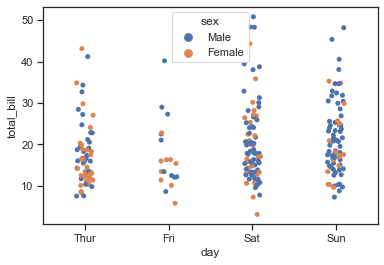

In [123]:
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips);

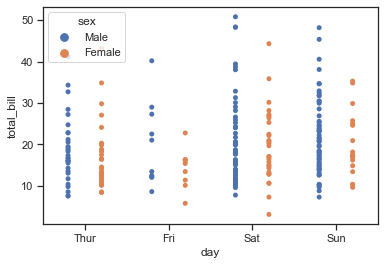

In [124]:
sns.stripplot(x='day', y='total_bill', hue='sex', dodge=True, jitter=False, data=tips);

In [125]:
# swarplot = strip + violin

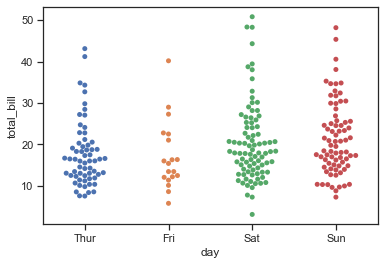

In [126]:
sns.swarmplot(x='day', y='total_bill', data=tips);
# don"t try in large dataset

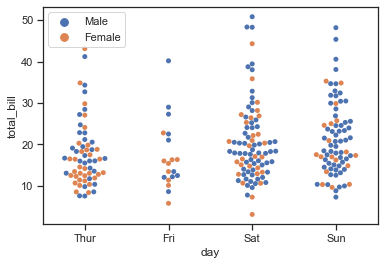

In [127]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips);
plt.legend(loc=2);

In [128]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\Mustafa\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Mustafa\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


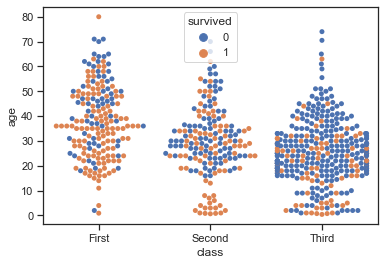

In [129]:
sns.swarmplot(x='class', y='age', hue='survived', data=titanic);

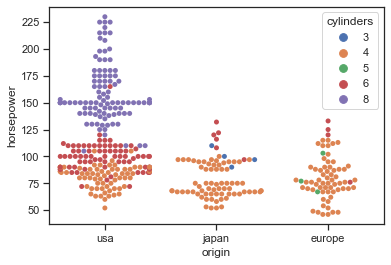

In [130]:
sns.swarmplot(x="origin", y="horsepower", data=mpg, hue='cylinders')

In [131]:
# catplot (former name ; factorplot)

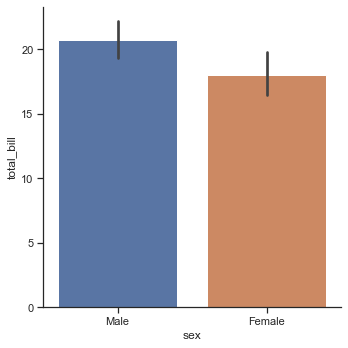

In [132]:
sns.catplot(x="sex", y="total_bill", data=tips, kind='bar')

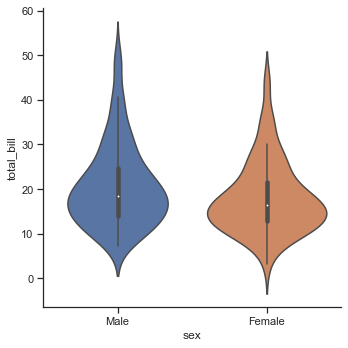

In [133]:
sns.catplot(x="sex", y="total_bill", data=tips, kind='violin')

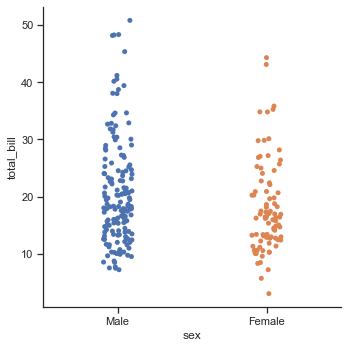

In [134]:
sns.catplot(x="sex", y="total_bill", data=tips, kind='strip')

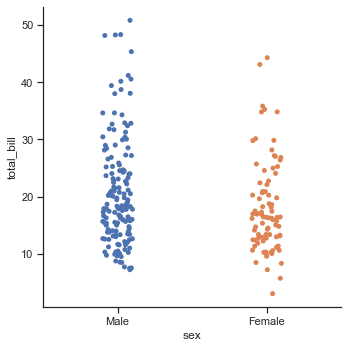

In [135]:
sns.catplot(x="sex", y="total_bill", data=tips)

In [136]:
## pointplot

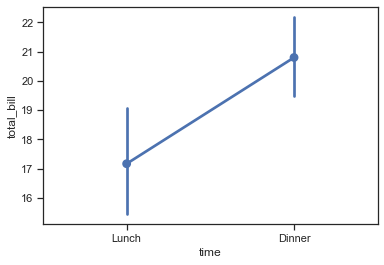

In [137]:
sns.pointplot(x="time", y="total_bill", data=tips)

In [138]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


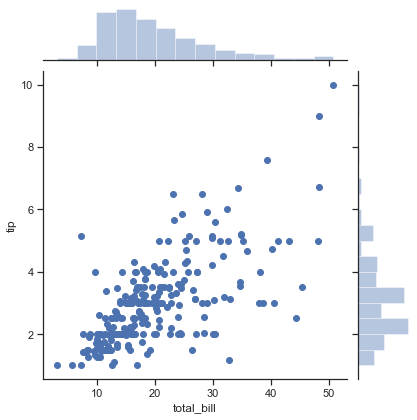

In [139]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

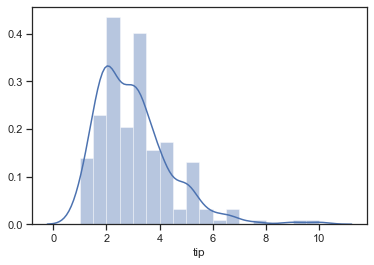

In [140]:
sns.distplot(tips['tip'], kde=True)

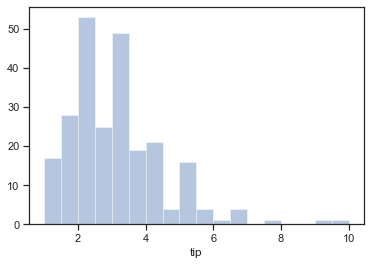

In [141]:
sns_plot = sns.distplot(tips['tip'], kde=False)

## 12/09/2020

In [142]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


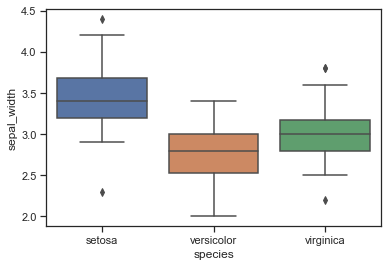

In [143]:
sns.boxplot(x="species", y="sepal_width", data=iris)

## Data Visualization with Seaborn

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [144]:
import seaborn as sns
%matplotlib inline
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
mpg=sns.load_dataset('mpg')

In [145]:
flights = sns.load_dataset('flights')

In [146]:
flights.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [147]:
tips = sns.load_dataset('tips')

In [148]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [149]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [150]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


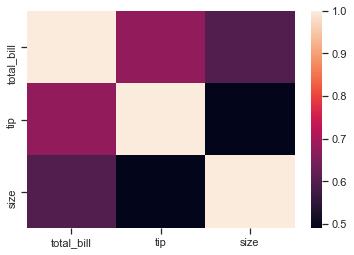

In [151]:
sns.heatmap(tips.corr())

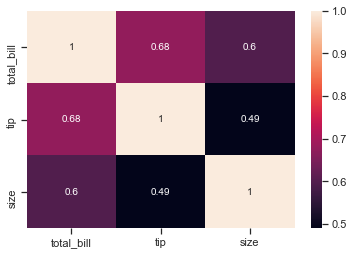

In [152]:
sns.heatmap(tips.corr(),annot=True)

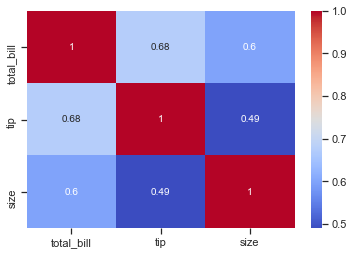

In [153]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [154]:
flights.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [155]:
flights.pivot_table('passengers', 'month', 'year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [156]:
flights.pivot_table(values='passengers', index='month', columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [157]:
flights.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


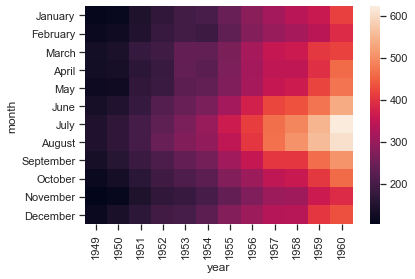

In [158]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

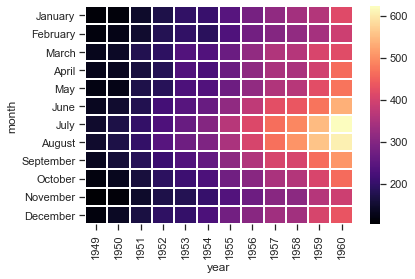

In [159]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

In [160]:
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


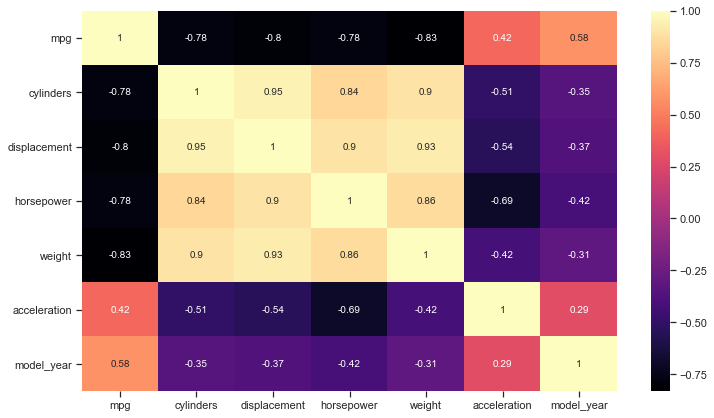

In [161]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(12,7))
sns.heatmap(mpg.corr(), cmap='magma', annot=True )

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

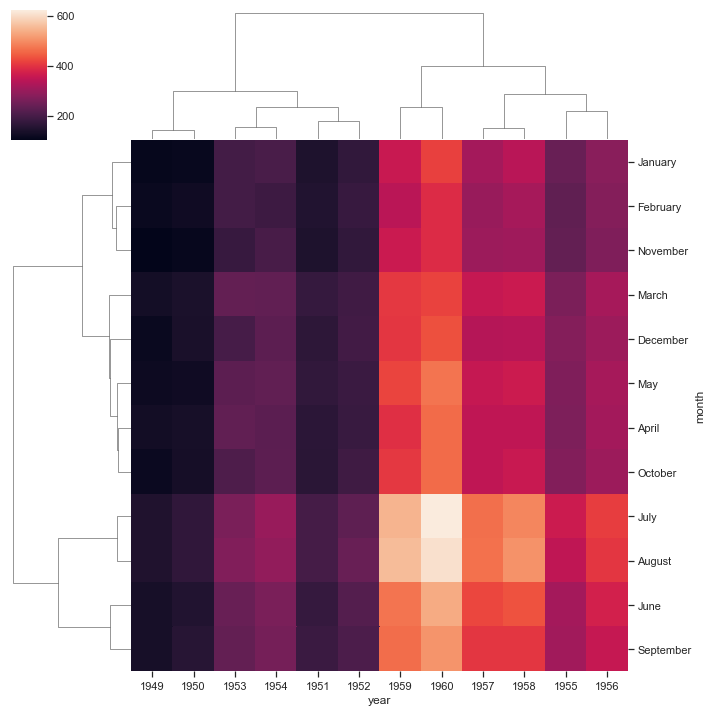

In [162]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

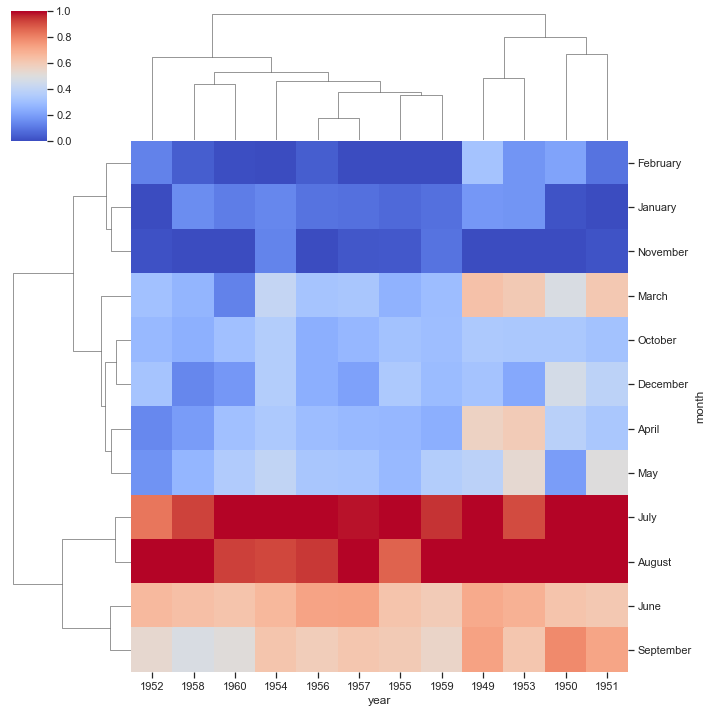

In [163]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
iris = sns.load_dataset('iris')

In [166]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

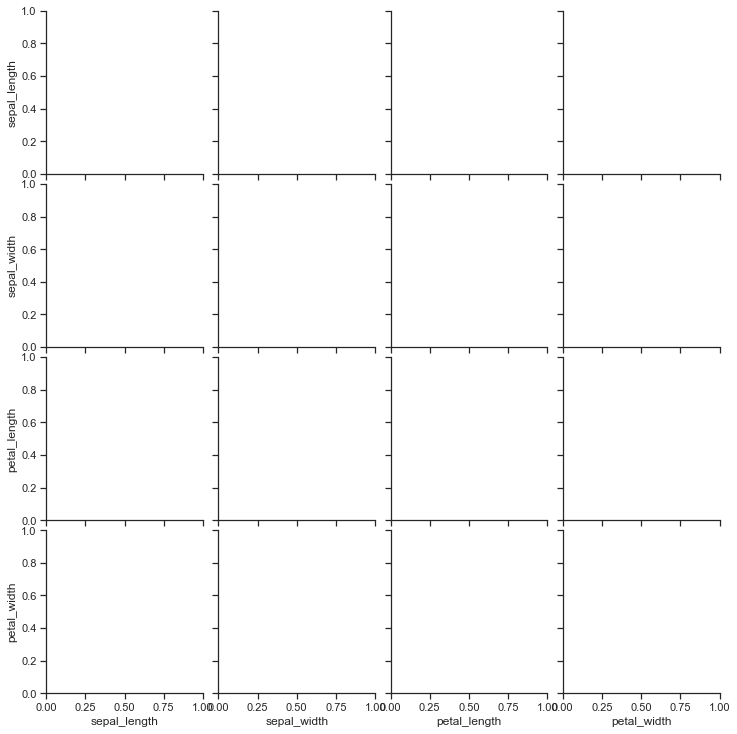

In [167]:
# Just the Grid
sns.PairGrid(iris)

## pairplot

In [168]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


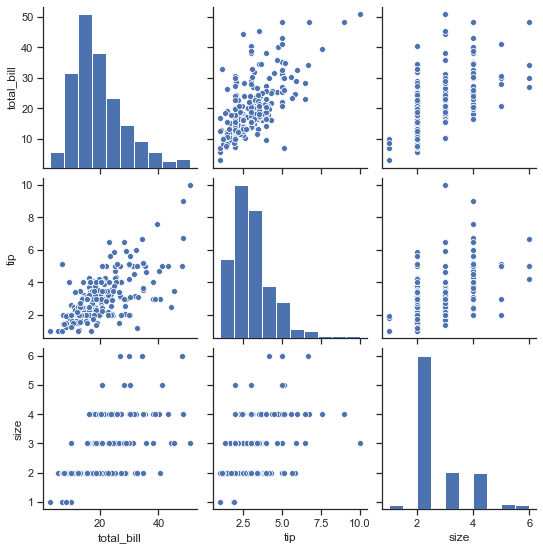

In [169]:
sns.pairplot(tips)

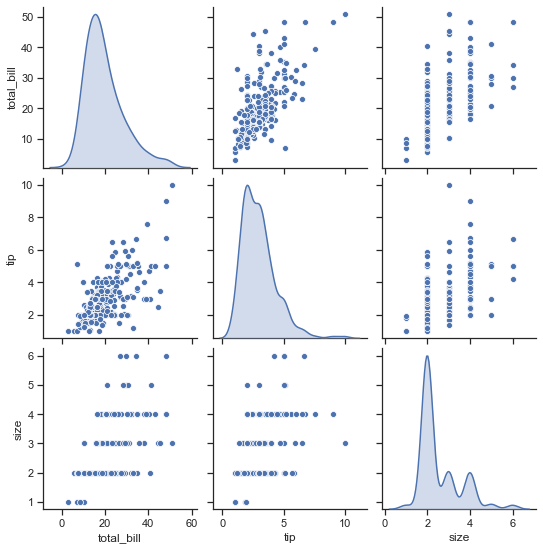

In [170]:
sns.pairplot(tips, diag_kind='kde') # diag_kind: 'auto' , kde, non

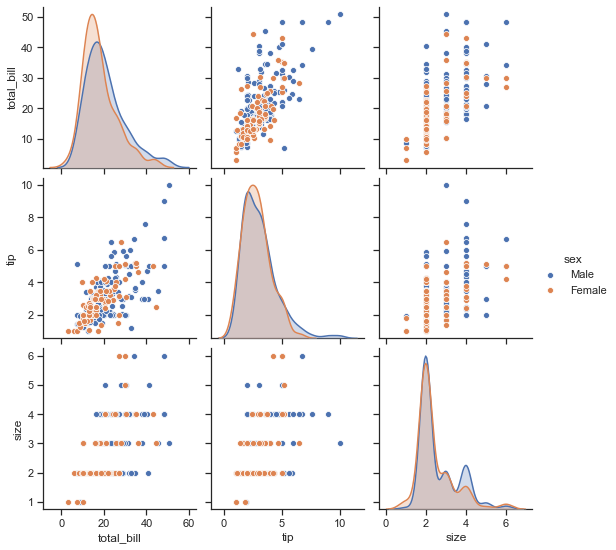

In [171]:
sns.pairplot(tips, hue="sex")

# pairgrid

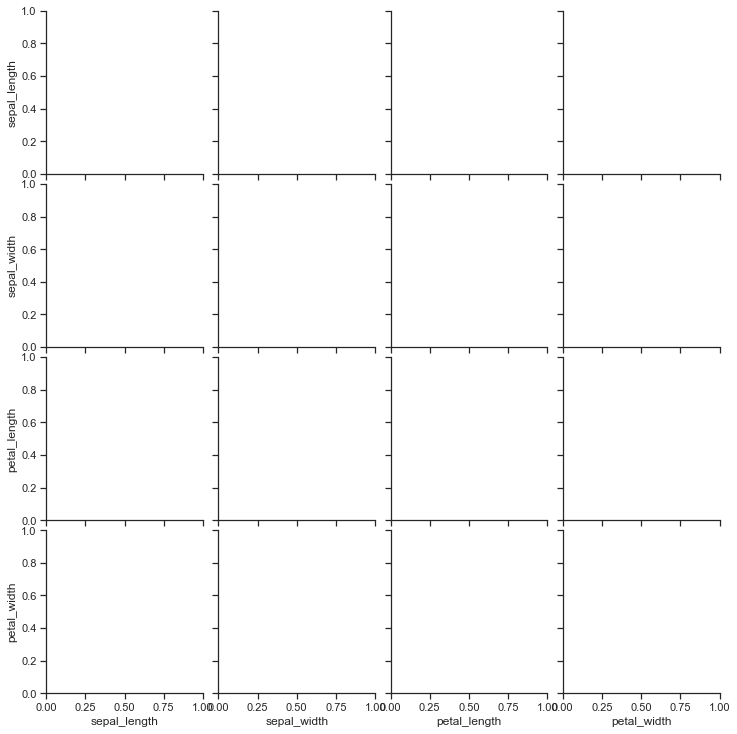

In [172]:
sns.PairGrid(iris)

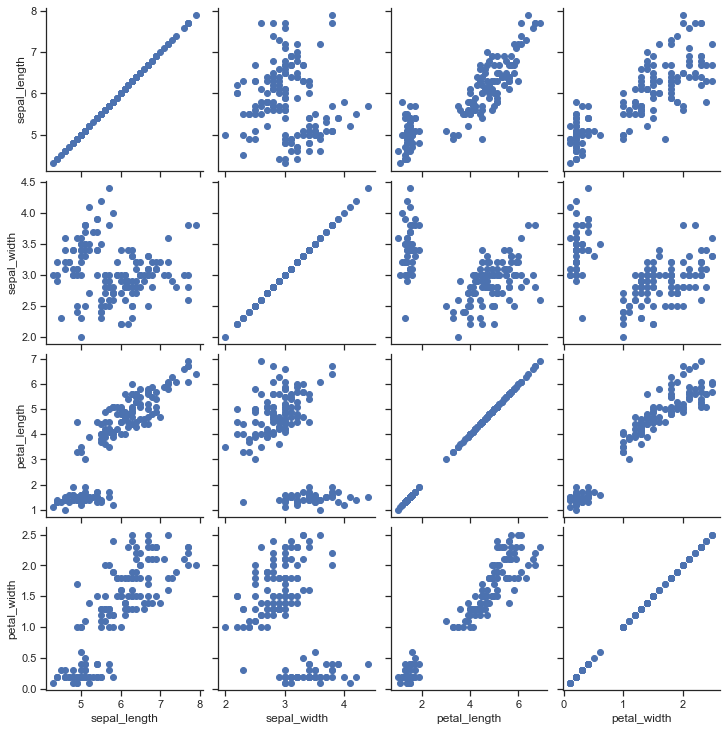

In [173]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

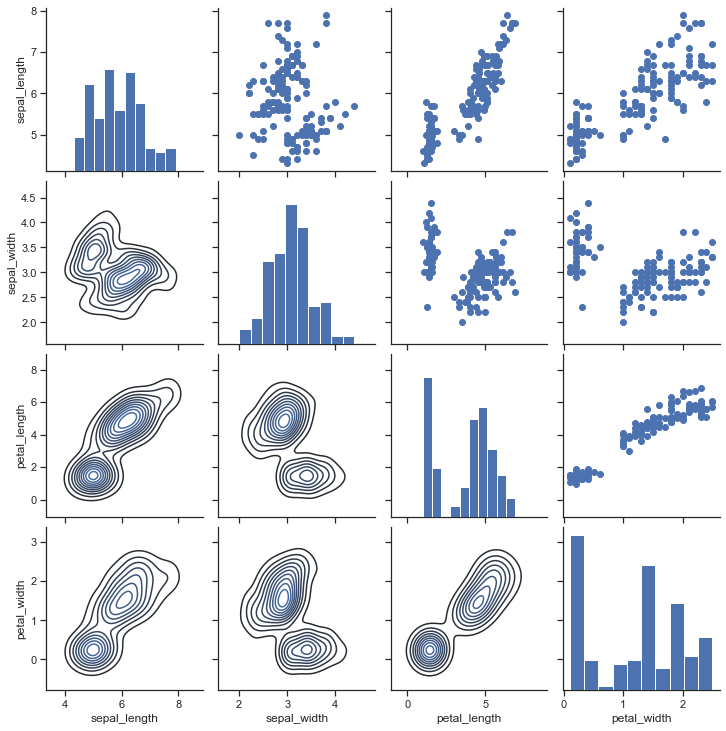

In [174]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

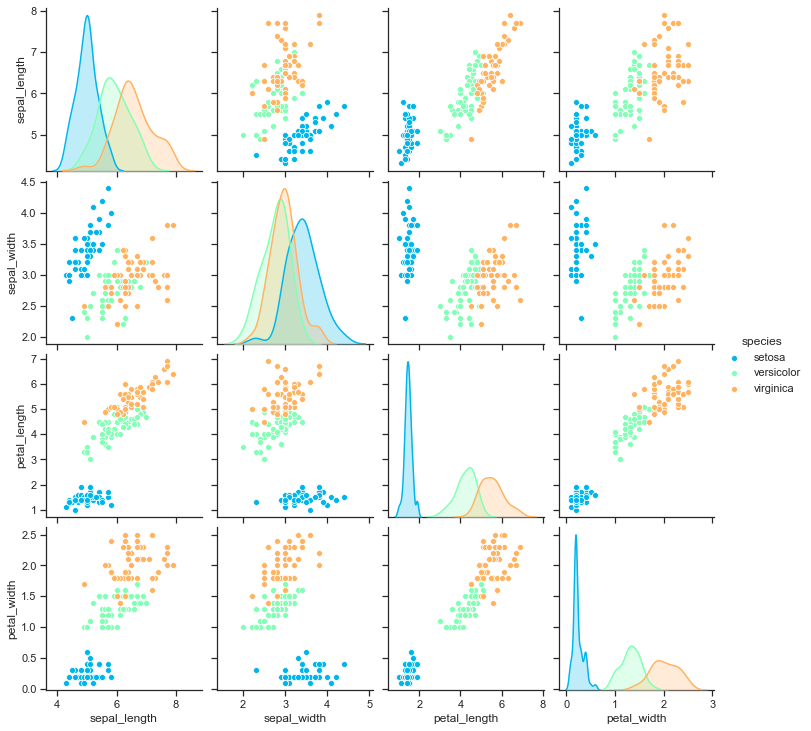

In [175]:
sns.pairplot(iris,hue='species',palette='rainbow')

# Facet Grid
FacetGrid is the general way to create grids of plots based off of a feature:

In [176]:
tips = sns.load_dataset('tips')

In [177]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


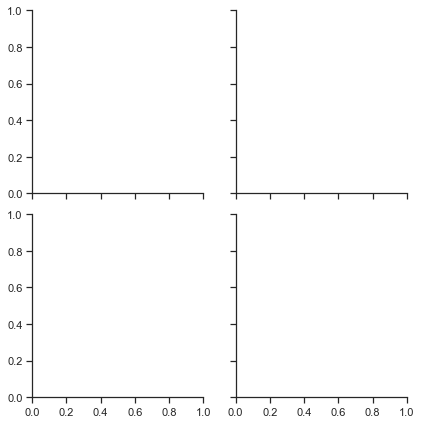

In [178]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

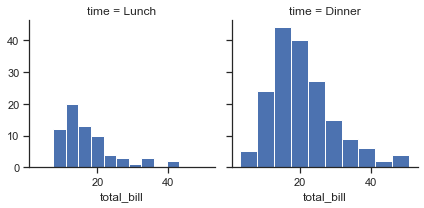

In [179]:
g = sns.FacetGrid(tips, col="time")
g = g.map(plt.hist, "total_bill")

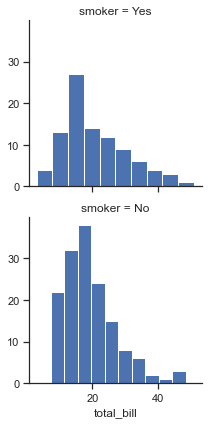

In [180]:
g = sns.FacetGrid(tips, row="smoker")
g = g.map(plt.hist, "total_bill")

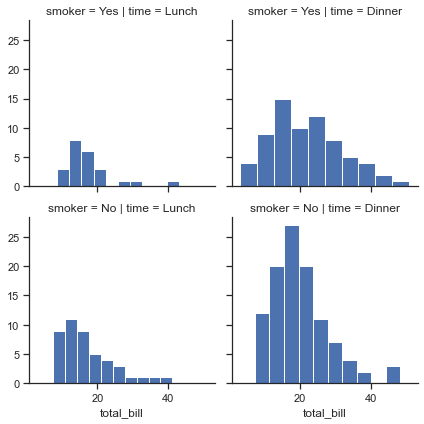

In [181]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill")

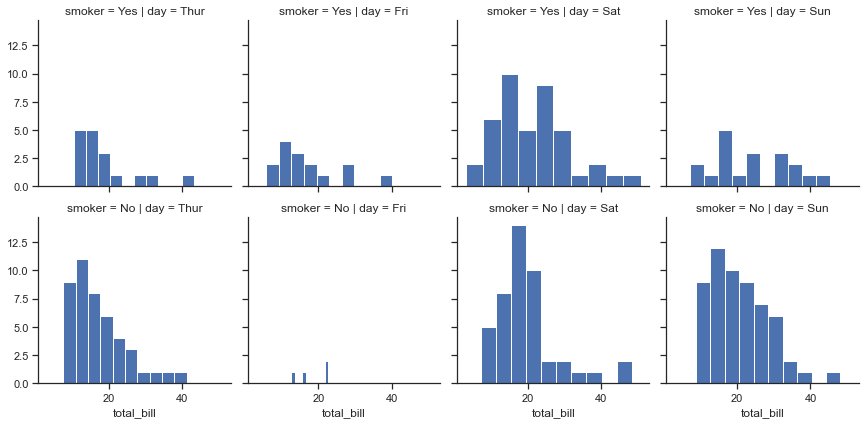

In [182]:
g = sns.FacetGrid(tips, col="day", row="smoker")
g = g.map(plt.hist, "total_bill")

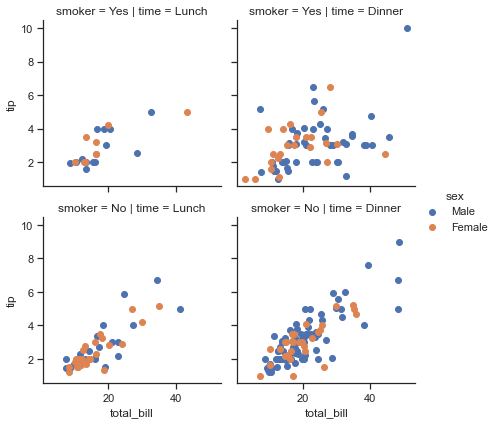

In [183]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [184]:
tips = sns.load_dataset('tips')

In [185]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

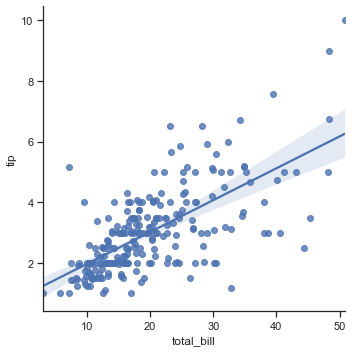

In [186]:
sns.lmplot(x='total_bill',y='tip',data=tips)

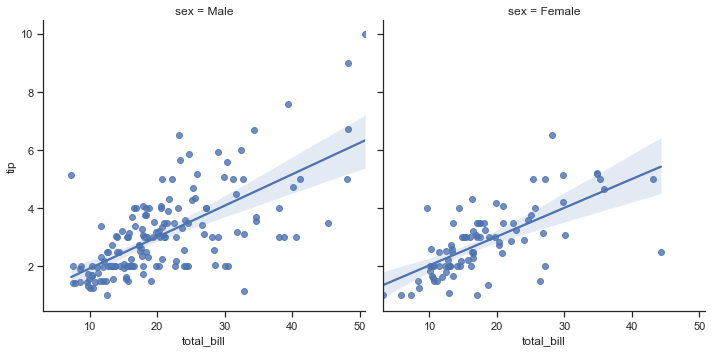

In [187]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

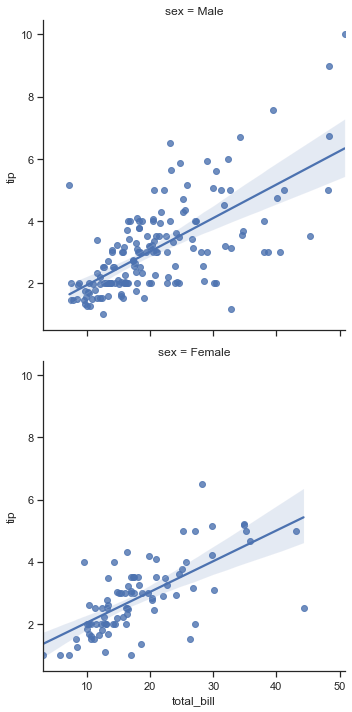

In [188]:
sns.lmplot(x='total_bill',y='tip',data=tips,row='sex')

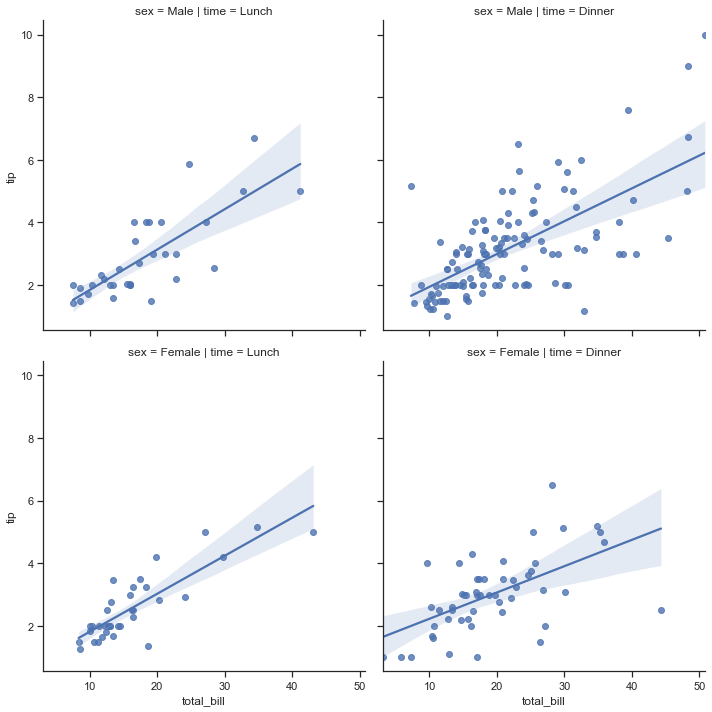

In [189]:
sns.lmplot(x='total_bill',ci=95, y='tip',data=tips,row='sex', col='time')

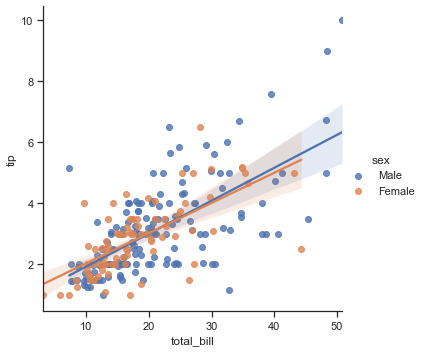

In [190]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

## aspect=1, height=5

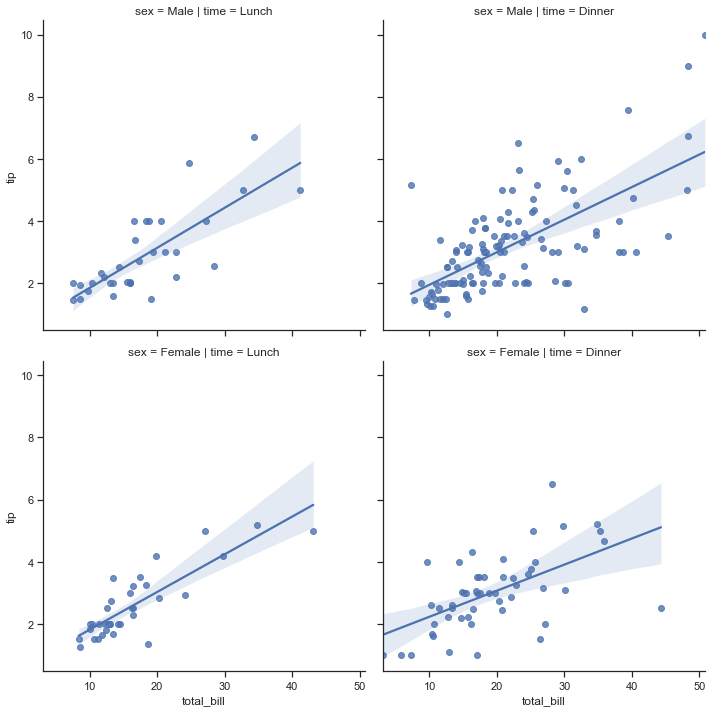

In [191]:
sns.lmplot(x='total_bill',ci=95, y='tip',data=tips,row='sex', col='time', aspect=1, height=5)

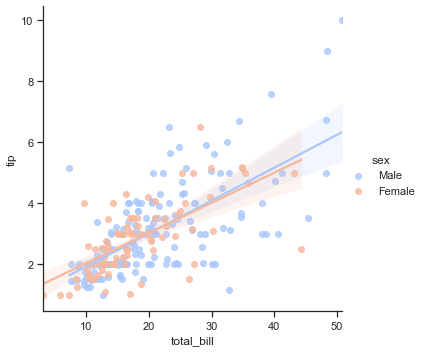

In [192]:
sns.lmplot(x='total_bill', ci=95 , y='tip',data=tips,hue='sex',palette='coolwarm')

<Figure size 1080x1440 with 0 Axes>

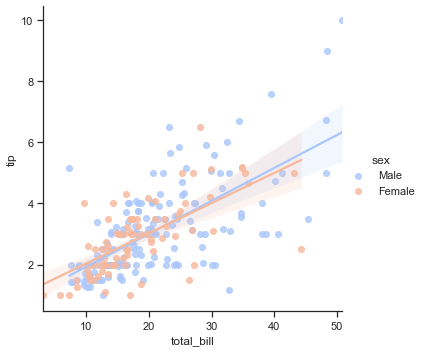

In [193]:
plt.figure(figsize=(15,20))
sns.lmplot(x='total_bill', ci=95 , y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

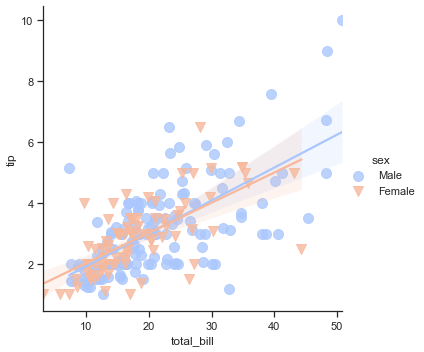

In [194]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

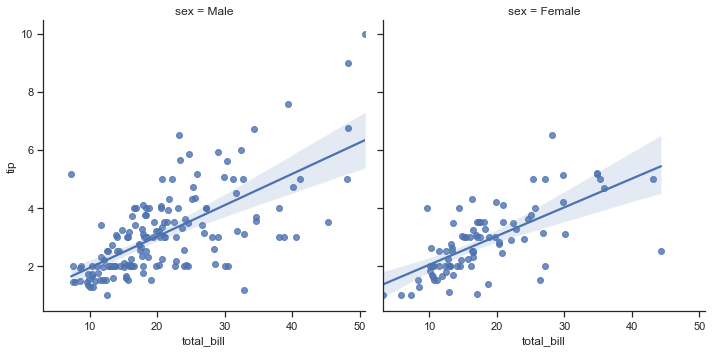

In [195]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

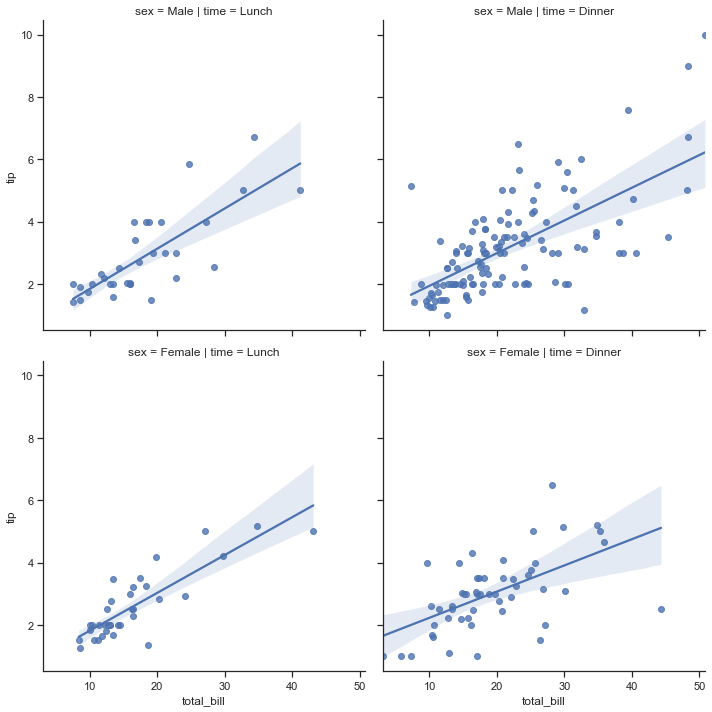

In [196]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

In [198]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Styles

You can set particular styles:

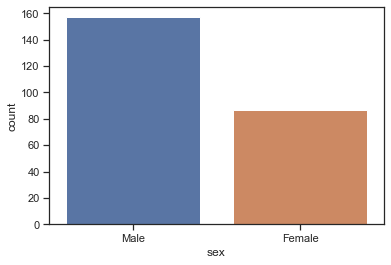

In [199]:
sns.countplot(x='sex',data=tips)

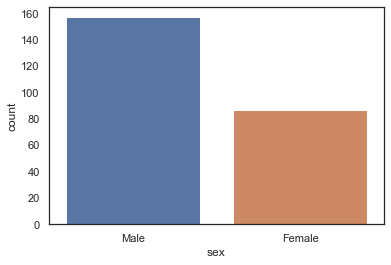

In [200]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

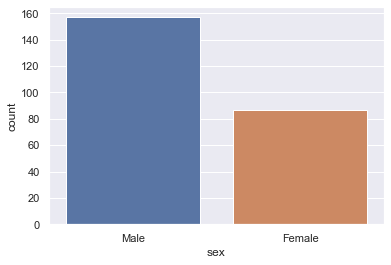

In [201]:
sns.set_style('darkgrid') # {darkgrid, whitegrid, dark, white, ticks}
sns.countplot(x='sex',data=tips,palette='deep')

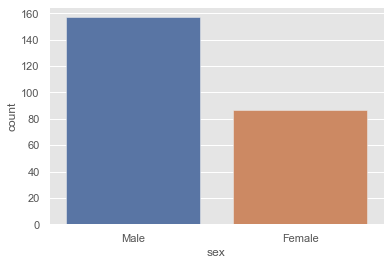

In [202]:
plt.style.use('ggplot')
sns.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

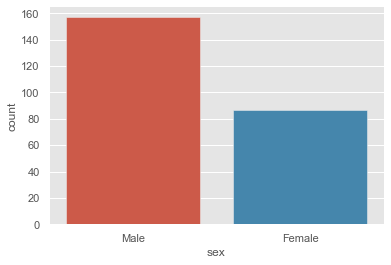

In [203]:
sns.countplot(x='sex',data=tips)
sns.despine()

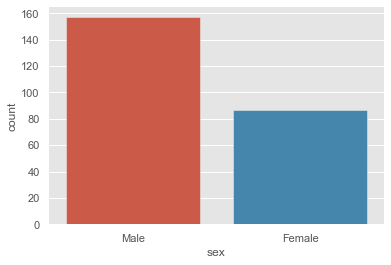

In [204]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

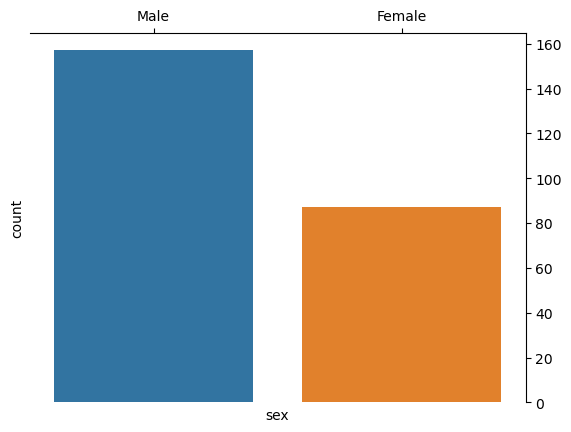

In [205]:
plt.style.use('default') 
sns.countplot(x='sex',data=tips)
sns.despine(left = True, bottom=True, top=False, right=False)

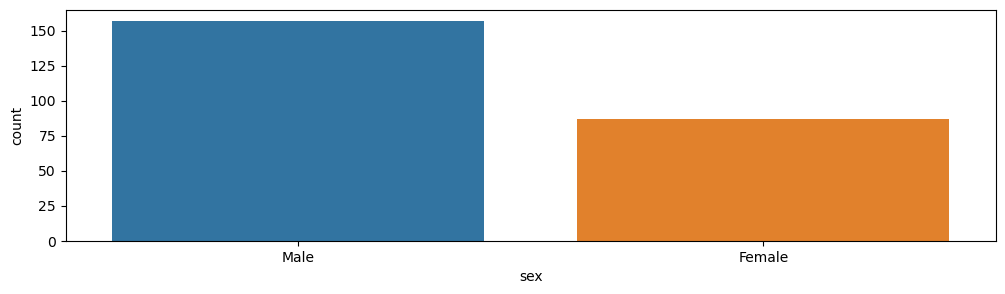

In [206]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

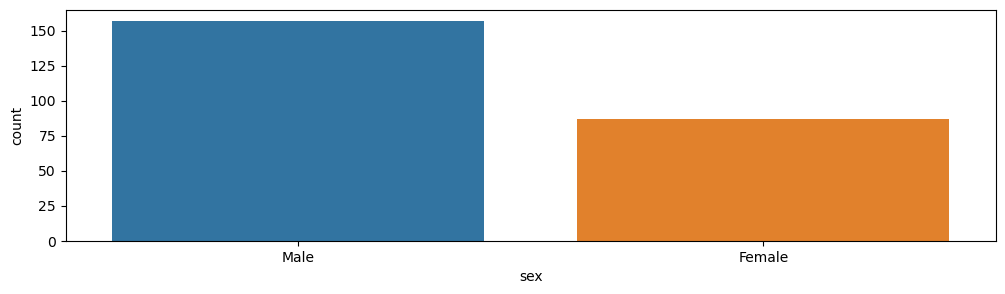

In [207]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

C:\Users\Mustafa\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


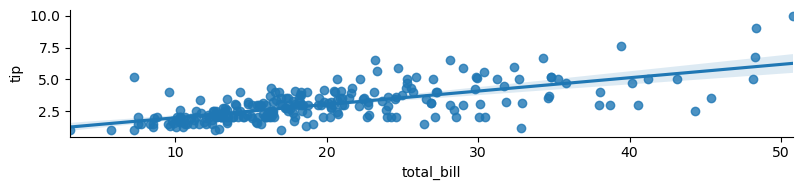

In [208]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:
is "notebook, and the other contexts are "paper", "talk", "poster"

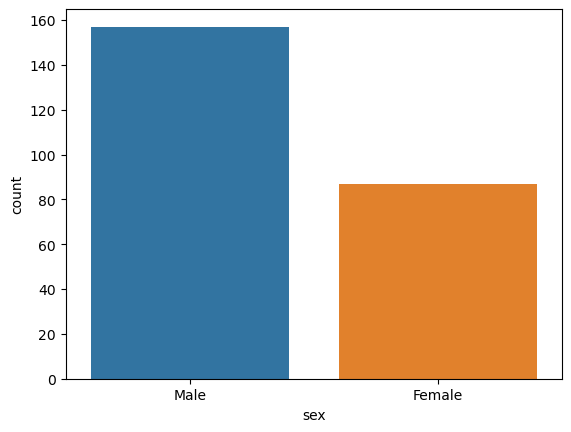

In [209]:
sns.set_context()
sns.countplot(x='sex',data=tips)

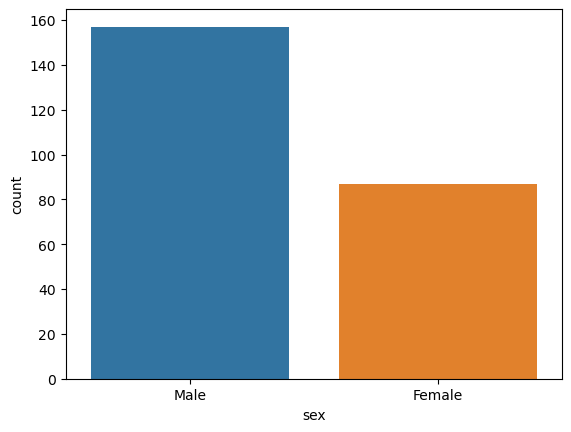

In [210]:
#sns.set_context("poster")
sns.countplot(x='sex',data=tips)

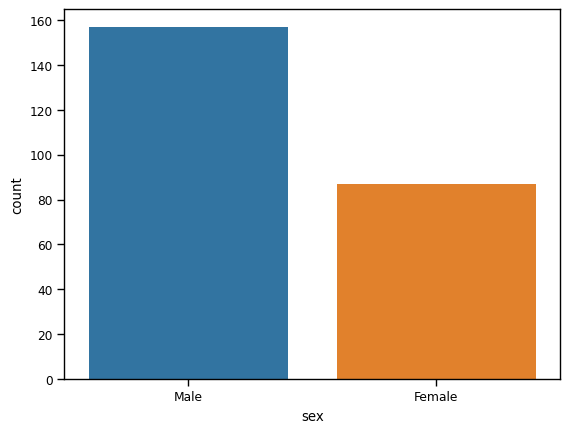

In [211]:
sns.set_context("paper")
sns.countplot(x='sex',data=tips)

In [212]:
# Color

In [213]:
x= ['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shel/PS',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']
y=[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

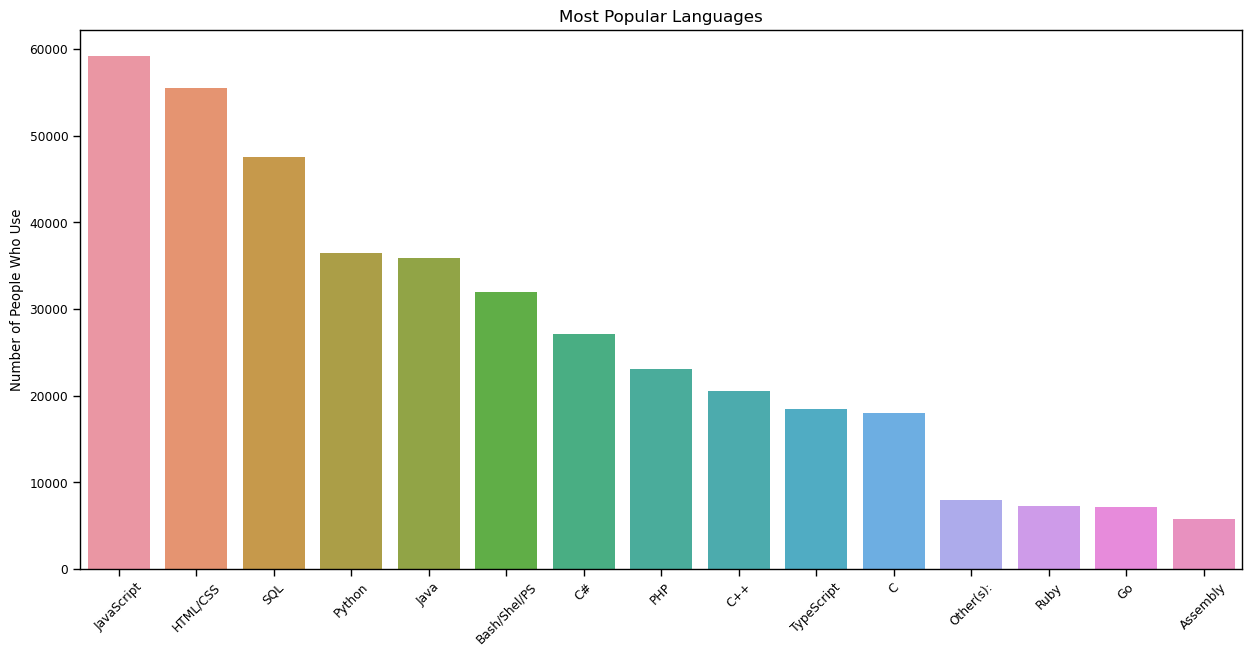

In [214]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_context('notebook')
sns.barplot(x,y, palette=None)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

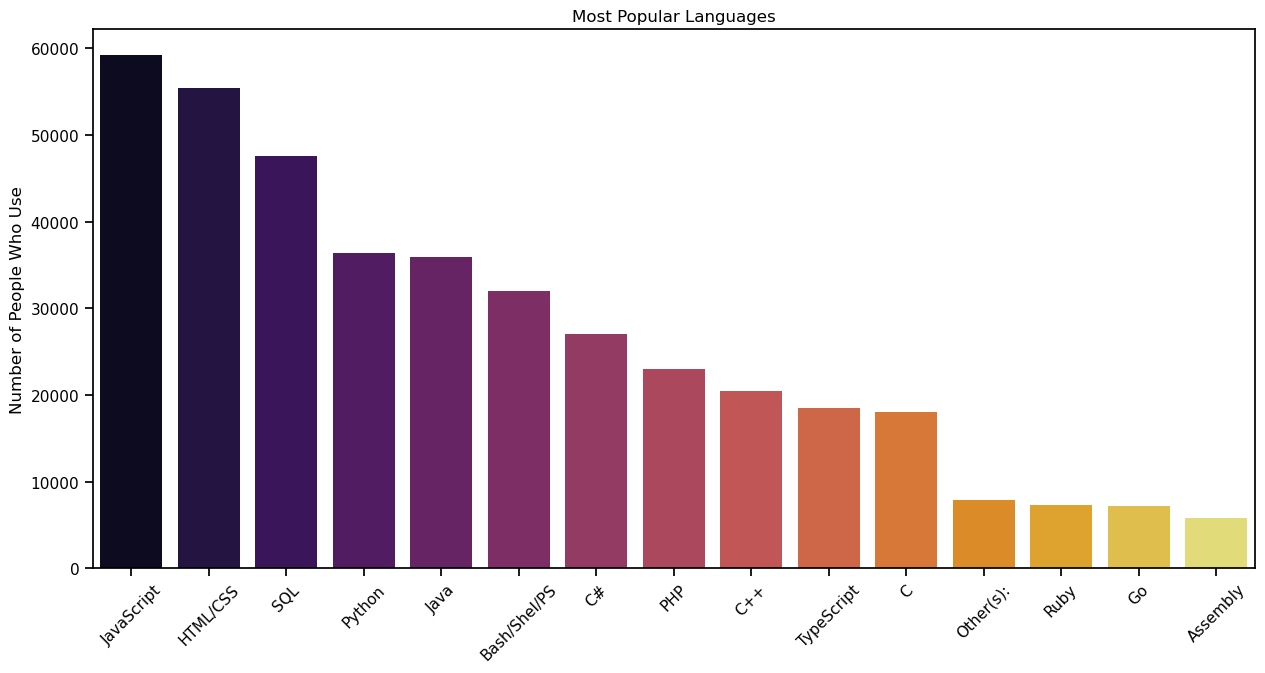

In [215]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_context('notebook')
sns.barplot(x,y, palette="inferno")
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

In [216]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


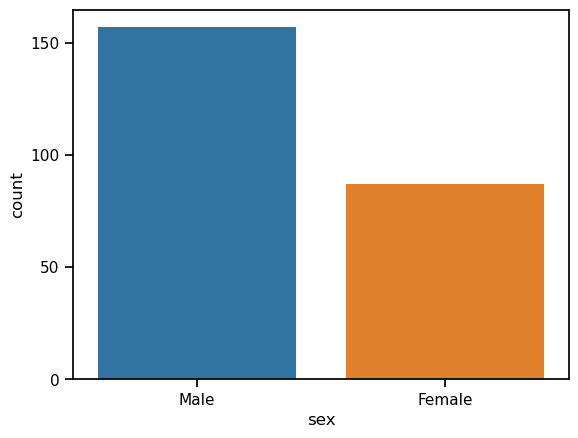

In [217]:
sns.countplot(x='sex',data=tips)
sns.set_context('poster')

In [218]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [219]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


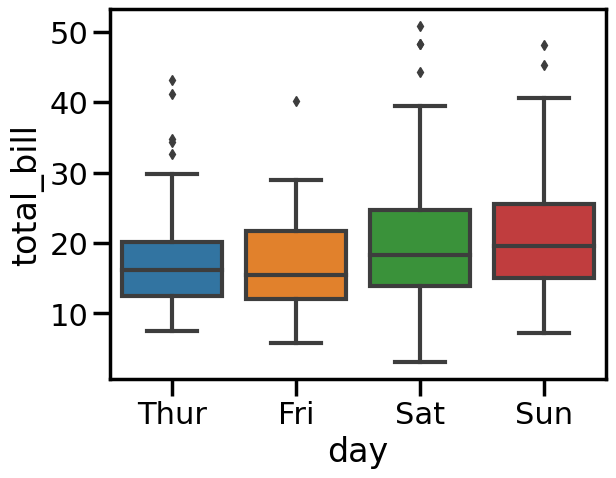

In [220]:
sns.boxplot(x="day", y="total_bill", data=tips)